## 🔢 **CNN with MNIST Data** 📈

## **Q1. Design a CNN with:**
* **a) One Convolution layer which uses 32 kernels each of size 3x3, stride = 1 and, padding =0**
* **b) One Pooling layerwhich uses MAXPOOLINGwith stride =2.**
* **c) One hidden layer having number of neurons = 100**
* **Note: use ReLU activation function after each convolution layer.**

Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

Importing Data:

In [ ]:
mnist = tf.keras.datasets.mnist

Splitting Data into Train and Test sets:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x train:", x_train.shape)
print("y train:", y_train.shape)
print("x test:", x_test.shape)
print("y test:", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
y test: (10000,)


####**Preprocessing Data:**

#####Normalizing values to decrease the time needed for optimizer to reach global optimum:

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

####**Creating the Neural Network:**

In [ ]:
model = tf.keras.Sequential()

Adding the layers one by one:

In [ ]:
model.add(tf.keras.Input((28,28,1)))
model.add(tf.keras.layers.Conv2D(32, strides = (1,1), kernel_size= (3,3), activation = "relu" , padding = "valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides =  (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "hidden_layer_1"))
model.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               540900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

Compiling and Training the Model:

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 40, epochs = 15, validation_split = 0.1)

Epoch 1/15
1350/1350 [==============================] - 17s 3ms/step - loss: 0.1813 - accuracy: 0.9457 - val_loss: 0.0643 - val_accuracy: 0.9833
Epoch 2/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0652 - val_accuracy: 0.9827
Epoch 3/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0613 - val_accuracy: 0.9838
Epoch 4/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0489 - val_accuracy: 0.9878
Epoch 5/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0509 - val_accuracy: 0.9888
Epoch 6/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0551 - val_accuracy: 0.9878
Epoch 7/15
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy

####**Testing the Model:**

* The model performs well with a high accuracy value and low loss value.
* This means the network predicts true positives and true negatives well
* Loss refers to the overall difference between the predicted versus actual outcome. The lower this value, the better your model performs on your data.


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9875


[0.0659392923116684, 0.987500011920929]

####**Plotting the Model's Performance:**

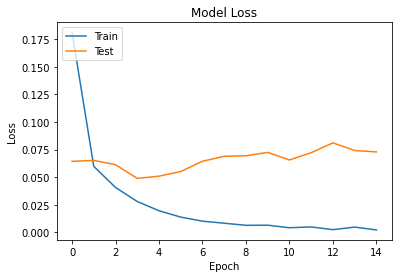

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* According to the plot, the model may be overfitting
* This is shown by the training loss continuing to decrease as the the number of epochs increase, while the test loss slightly increases

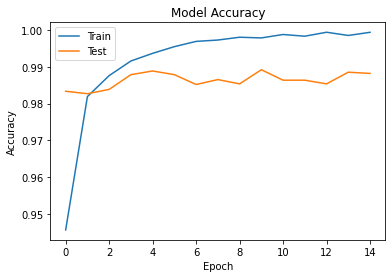

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The accuracy plot also suggests that the model is overfitting, as the training accuracy increases while the testing loss decreases 